# Auswirkungen von Wintertransfers auf die Leistungen der Super-League-Teams seit 2005

In [2]:
#Importieren aller nötigen Bibliotheken

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
from datetime import datetime
from datetime import timedelta

## A) Einlesen aller Transferdaten seit 2005 in der Super League


In [ ]:
alle_transfers = []   

# Liste aller Vereine:

url_liste = [["fc-luzern/transfers/verein/434/plus/0?saison_id=","Luzern"],
             ["neuchatel-xamax-fcs/transfers/verein/9084/plus/0?saison_id=","Xamax"],
            ["neuchatel-xamax/transfers/verein/625/plus/0?saison_id=","Xamax"],["fc-st-gallen-1879/transfers/verein/257/plus/0?saison_id=","St.Gallen"],
             ["fc-thun/transfers/verein/938/plus/0?saison_id=","Thun"],["grasshopper-club-zurich/transfers/verein/504/plus/0?saison_id=","GC"],
             ["fc-vaduz/transfers/verein/163/plus/0?saison_id=","Vaduz"],["fc-basel-1893/transfers/verein/26/plus/0?saison_id=","Basel"],
             ["fc-zurich/transfers/verein/260/plus/0?saison_id=","Zürich"],["bsc-young-boys/transfers/verein/452/plus/0?saison_id=","YB"],
             ["fc-lausanne-sport/transfers/verein/527/plus/0?saison_id=","Lausanne"],["servette-fc/transfers/verein/61/plus/0?saison_id=","Servette"],
             ["fc-sion/transfers/verein/321/plus/0?saison_id=","Sion"],["ac-bellinzona/transfers/verein/2047/plus/0?saison_id=","Bellinzona"], 
             ["fc-aarau/transfers/verein/116/plus/0?saison_id=","Aarau"],["fc-lugano/transfers/verein/2790/plus/0?saison_id=","Lugano"], 
             ["fc-schaffhausen/transfers/verein/1277/plus/0?saison_id=","Schaffhausen"],["yverdon-sport-fc/transfers/verein/322/plus/0?saison_id=","Yverdon"],
             ["fc-wil-1900/transfers/verein/850/plus/0?saison_id=","Wil"]]

# durch die Liste mit urls und die Saisons iterieren, Daten scrapen:

for url in url_liste:
    for jahr in range(2005,2018):
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        webseite = "https://www.transfermarkt.ch/" + url[0] + str(jahr) + "&pos=&detailpos=&w_s=w"
        r = requests.get(webseite, headers=headers)
        print(webseite) # um Scrapevorgang nachverfolgen zu können, drucke ich die bearbeitete url aus
        
        # html-code der url auslesen:
        soup = BeautifulSoup(r.text, 'html.parser') 
        
        # ich zähle die Transferanzahl pro Team, um auch diese ins Verhältnis zum Erfolg zu setzen        
        box_suppen1 = soup.find_all('td', {'rowspan':'2'}) 
        anzahlwintertransfers = len(box_suppen1) / 2
        
        # Wertezunahme (winterein) und Werteverlust (winteraus) scrapen
        box_suppen = soup.find_all('td', {'colspan':'6'})
        try:
            winterein = box_suppen[2].text.split(": ")[1][:-7]
            if "," in winterein:
                winterein = winterein + "0"    # Mio-Beträge in Tausender umrechnen, z.B. 12,40 (Mio) wird zu 12400
                winterein = re.sub(',', '', winterein)
            winteraus = box_suppen[5].text.split(": ")[1][:-7]
            if "," in winteraus:
                winteraus = winteraus + "0"    # Mio-Beträge in Tausender umrechnen
                winteraus = re.sub(',', '', winteraus)
        except: continue  # wenn keine Transfer getätigt wurden, gehe weiter
            
        
        # exakt dasselbe wie oben mache ich nun auch noch mit den Sommertransfers:
        
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        webseite = "https://www.transfermarkt.ch/" + url[0] + str(jahr) + "&pos=&detailpos=&w_s=s"
        r = requests.get(webseite, headers=headers)
        print(webseite)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        box_suppen1 = soup.find_all('td', {'rowspan':'2'})
        anzahlsommertransfers = len(box_suppen1) / 2
        
        
        box_suppen = soup.find_all('td', {'colspan':'6'})
        try:
            sommerein = box_suppen[2].text.split(": ")[1][:-7]
            if "," in sommerein:
                sommerein = sommerein + "0"
                sommerein = re.sub(',', '', sommerein)
            sommeraus = box_suppen[5].text.split(": ")[1][:-7]
            if "," in sommeraus:
                sommeraus = sommeraus + "0"
                sommeraus = re.sub(',', '', sommeraus)
        except: continue   # wenn keine Transfer getätigt wurden, gehe weiter
            
            
        # gescrapte Daten in ein Dictionary abspeichern
        
        mini_dict = {"Team": url[1],
                    "Saison": jahr,
                    "Winteraus": winteraus,
                    "Winterein": winterein,
                    "Sommeraus": sommeraus,
                    "Sommerein": sommerein,
                    "Anzahlwintertransfers" : anzahlwintertransfers,
                    "Anzahlsommertransfers" : anzahlsommertransfers}

        alle_transfers.append(mini_dict)
        winteraus = "0"
        sommeraus = "0"
        winterein = "0"
        sommerein = "0"

In [179]:
# Dataframe aus den gescrapten Daten herstellen und abspeichern
df = pd.DataFrame(alle_transfers)

df.to_csv('alletransfers_sl.csv')

In [ ]:
# und wieder von der Datei laden

dft = pd.read_csv("alletransfers_sl.csv")
dft.head(3)

In [4]:
# aus GC mache Grasshoppers

def grasshoppers_macher(team):
    if team == "GC":
        team = "Grasshoppers"
    return team

dft['Team'] = dft['Team'].apply(grasshoppers_macher)

## Spieldaten einlesen

Von einem bereits erstellten Notebook (Projekt Datenerhebung Zuschauerzahlen) lese 
ich nun alle Resultate der vergangenen 15 Super-League-Saisons ein.

In [6]:
dfs = pd.read_csv("allespiele_punkte.csv")

In [7]:
teamliste = set(list(dfs['Heimteam']))
jahre = set(list(dft["Saison"]))

In [8]:
# im Spiel-Datensatz lasse ich immer die pro Team geholten Punkte der vergangenen 18 Spiele zusammenzählen
# so kann ich in einem nächsten Schritt Hin- und Rückrundenpunkte ausrechnen

for team in teamliste:
    dfs[team] = dfs[(dfs["Heimteam"] == team) | (dfs["Auswärtsteam"] == team)][team].rolling(min_periods=1, window=18).sum()
    
    
dfs.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Auswärtsteam,Datum,Heimteam,Rang Auswärtsteam,Rang Heimteam,Runde,Saison,...,Luzern,Zürich,Bellinzona,YB,Vaduz,Xamax,Lugano,St.Gallen,Schaffhausen,Yverdon
0,0,0,0,Xamax,16.07.2003,Grasshoppers,9,7,1,2003/2004,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1,1082,1164,1164,Aarau,16.07.2003,Thun,8,6,1,2003/2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1874,2308,2308,Zürich,16.07.2003,Basel,4,1,1,2003/2004,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2560,4058,4058,Wil,16.07.2003,Servette,0,3,1,2003/2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,680,698,698,YB,16.07.2003,St.Gallen,2,5,1,2003/2004,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN
5,1,1,1,St.Gallen,19.07.2003,Xamax,0,4,2,2003/2004,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.0,NaN,NaN
6,1436,1629,1629,Grasshoppers,19.07.2003,Aarau,8,5,2,2003/2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2152,2845,2845,Servette,19.07.2003,Zürich,2,7,2,2003/2004,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1875,2309,2309,Basel,22.07.2003,YB,3,1,2,2003/2004,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1083,1165,1165,Thun,22.07.2003,Wil,6,9,2,2003/2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Zusammenführen von Transferdaten und Spieldaten
Nun, nachdem ich die beiden Datensätze (Transfers und Spiele/Punkte) eingelesen habe, 
ergänze ich den Transfer-Datensatz mit den Hin- und Rückrunden-Punkten der jeweiligen Teams.
So kann danach die Erfolgsveränderung von Hin- zu Rückrunde mit den Wintertransfers 
verglichen werden.

In [9]:
dft["Hinrundenpunkte"] = 0
dft["Rückrundenpunkte"] = 0

# für alle Teams und alle Saisons werden.....
for team in teamliste:
    for jahr in jahre:
        saison = str(jahr) + "/" + str(jahr+1)
        
        #.....aus dem Spiel-Datensatz die Hin- und Rückrundenpunkte ausgelesen....
        # sind die Teams nicht in der Spielliste (except), waren sie in jener Saison nicht in der Super League
        try:
            hinrundenpunkte = dfs[((dfs["Heimteam"] == team) | (dfs["Auswärtsteam"] == team)) & (dfs["Runde"] == 18) & (dfs["Saison"] == saison)][team].values[0]
        except: continue
        try:   
            rückrundenpunkte = dfs[((dfs["Heimteam"] == team) | (dfs["Auswärtsteam"] == team)) & (dfs["Runde"] == 36) & (dfs["Saison"] == saison)][team].values[0]
        except: 
            try: rückrundenpunkte = dfs[((dfs["Heimteam"] == team) | (dfs["Auswärtsteam"] == team)) & (dfs["Runde"] == 34) & (dfs["Saison"] == saison)][team].values[0]
            except: continue
                
        #....und in den Transfers-Datensatz eingefügt
        
        dft.loc[(dft["Team"] == team) & (dft["Saison"] == jahr), "Hinrundenpunkte"] = hinrundenpunkte
        dft.loc[(dft["Team"] == team) & (dft["Saison"] == jahr), "Rückrundenpunkte"] = rückrundenpunkte

        
        
        
        
        

In [10]:
dft = dft[dft.Rückrundenpunkte != 0]   
# nur jene Saisons der Teams in der Liste lassen, in der die Teams auch in der SL spielten 

In [ ]:
# ich füge eine weitere Spalte ein: Die Punkte der vorherigen Rückrunde. Damit kann ich auch die Sommertransfers 
# auf ihre Effektivität prüfen 

dft["vorherige_rückrundenpunkte"] = 0
for team in teamliste:
    for jahr in jahre:
        try:
            dft.loc[(dft["Team"] == team) & (dft["Saison"] == jahr), "vorherige_rückrundenpunkte"] = dft[(dft["Team"] == team) & (dft["Saison"] == jahr-1)]["Rückrundenpunkte"].values[0]
        except: continue 
            
            
            

In [ ]:
#in der Rückrunde, als Xamax ausfiel (2011/12), müssen für alle anderen Teams Punkte 
#gleichmässig verteilt werden, damit es insgesamt keine Ungenauigkeiten gibt


dft.loc[dft["Saison"] == 2011, "Rückrundenpunkte"] = (dft[dft["Saison"] == 2011]["Rückrundenpunkte"].values[0]) + 3




In [13]:
dft = dft.replace([np.inf, - np.inf], 0)
# Daten reinigen

In [14]:
#Winter- und Sommerzuwachs an Punkten: Wurde die Rückrunde besser/schlechter als die Hinrunde? 

dft["winterzuwachs"] = dft["Winterein"] - dft["Winteraus"]
dft["Punktezuwachs"] = dft["Rückrundenpunkte"] - dft["Hinrundenpunkte"]
dft["Sommerzuwachs"] = dft["Sommerein"] - dft["Sommeraus"]
dft["Punktezuwachs_Sommer"] = dft["Hinrundenpunkte"] - dft["vorherige_rückrundenpunkte"]


# Daten auswerten
Zusammenhänge in den Daten finden

## 1) hat die Anzahl Wechsel im Winter einen Einfluss auf den Erfolg der Teams in der Rückrunde?

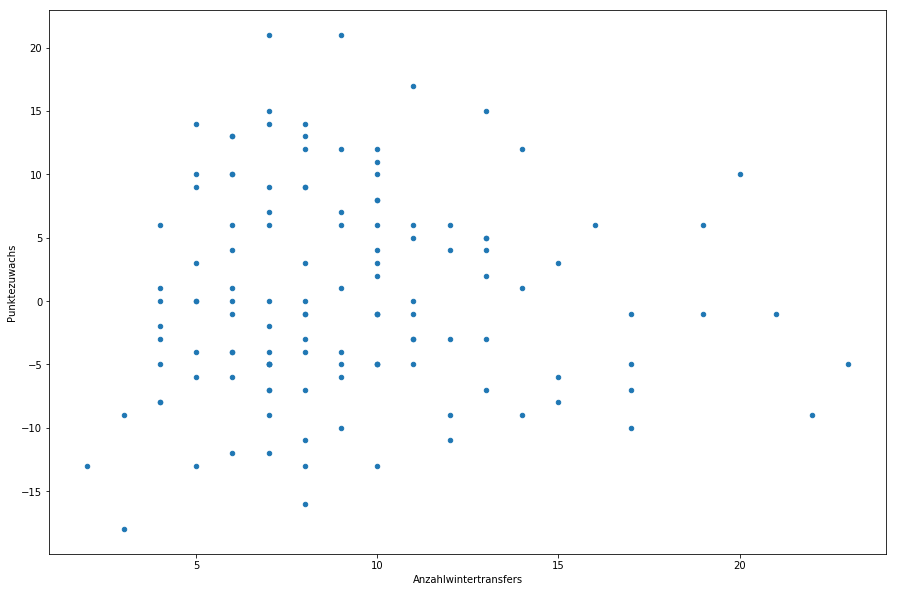

In [16]:
dft.plot(x='Anzahlwintertransfers', y='Punktezuwachs', kind='scatter', figsize=(15,10))

In der obigen Grafik zeigt sich keine deutliche Tendenz. Ohnehin muss die Aussagekraft der Anzahl der Transfers relativiert werden. Oft werden im Winter einfach Nachwuchsspieler aus den eigenen Reihen ins Trainingskader integriert. Oder es kehren Leihspieler zurück, die aber gleich wieder ausgeliehen werden. Auf Transfermakrt erscheinen alle diese Transfers - sie sind aber nicht relevant, was den Einfluss auf den Charkter eines Clubs angeht. Interessanter sind deshalb die Transfersummen. Wo wertvolle Spieler verlorengehen bzw. dazukommen, ist ein substanzieller Einfluss auf das Team wahrscheinlicher. Deshalb:

## 2) hat die Wertezu- oder abnahme einen Einfluss auf den Erfolg der Teams in der Rückrunde?

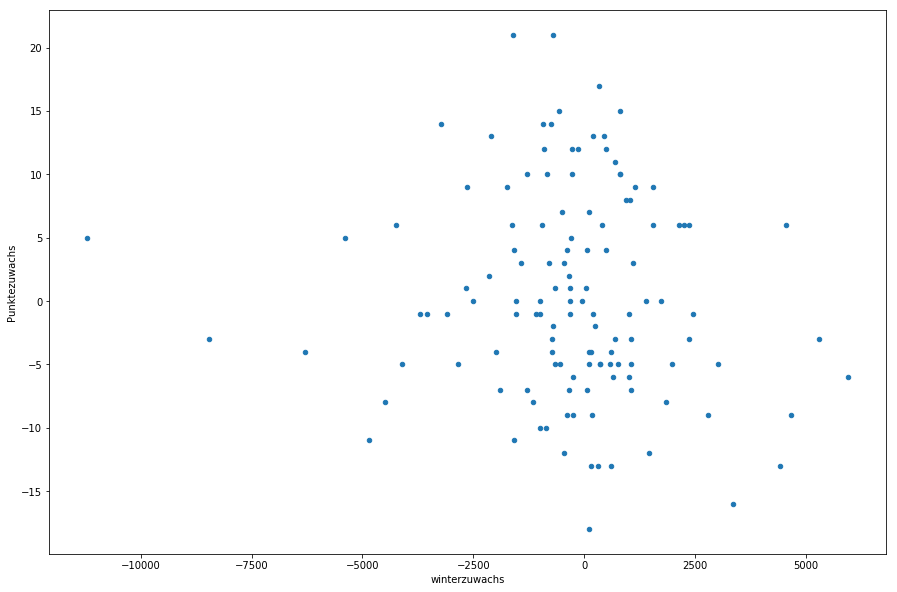

In [17]:
dft.plot(x='winterzuwachs', y='Punktezuwachs', kind='scatter', figsize=(15,10))

In der obigen Grafik würde man gemeinhin annehmen, dass die Punkte in der Tendenz von links unten nach rechts oben verlaufen: Je mehr Wert ein Team an Wert gewinnt, desto stärker müsste es doch werden in der Rückrunde. Eine solche Linie ist aber nicht zu erkennen. Im Gegenteil: Eine Tendenz lässt sich eher von rechts unten nach links oben ausmachen, zumindest sind rechts unten  am meisten Punkte zu finden: Dort sind jene Teams, die trotz Wertezuwachs an Leistung einbüssten.

Das kann man auch in Zahlen ausrücken:

In [28]:
dft_rechtsunten = dft[(dft["winterzuwachs"] >= 0) & (dft["Punktezuwachs"] < 0)]
dft_rechtsunten["Team"].size
#rechtsunten gibt's 35 Fälle (teurer, aber weniger erfolgreich)

35

In [30]:
dft_linksunten = dft[(dft["winterzuwachs"] < 0) & (dft["Punktezuwachs"] < 0)]
dft_linksunten["Team"].size
#linksunten gibt's 30 Fälle (weniger teuer und weniger erfolgreich)

30

In [31]:
dft_linksoben = dft[(dft["winterzuwachs"] < 0) & (dft["Punktezuwachs"] >= 0)]
dft_linksoben["Team"].size
#linksoben gibt's 37 Fälle (weniger teuer und dennoch erfolgreich)

37

In [32]:
dft_rechtsoben = dft[(dft["winterzuwachs"] >= 0) & (dft["Punktezuwachs"] >= 0)]
dft_rechtsoben["Team"].size
# nur 25 Fälle gibt's rechtsoben (teurer und erfolgreicher)

25

Anders ausgedrückt: Von jenen 60 Teams, die im Winter an Wert zulegten, wurden 25 besser und 35 schlechter

In einem Balkendiagramm zeigt sich ebenfalls in der Tendenz: Je mehr Geld investiert wurde, desto weniger Punkte holte man:

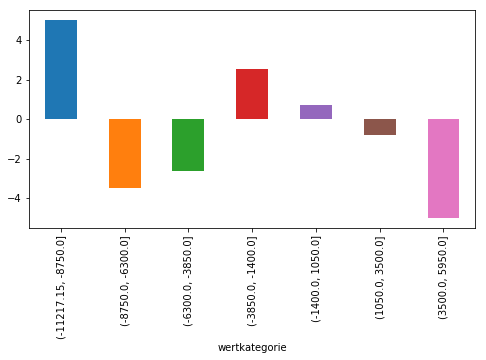

In [37]:
dft["wertkategorie"] = pd.cut(dft['winterzuwachs'], bins=7)
dft.groupby ("wertkategorie")["Punktezuwachs"].mean().plot(kind='bar', figsize=(8,4))

Wer im Winter wertemässig zulegt, wird also nur im selteneren Fall erfolgreicher.

## Wie sieht es bei Sommertransfers aus?

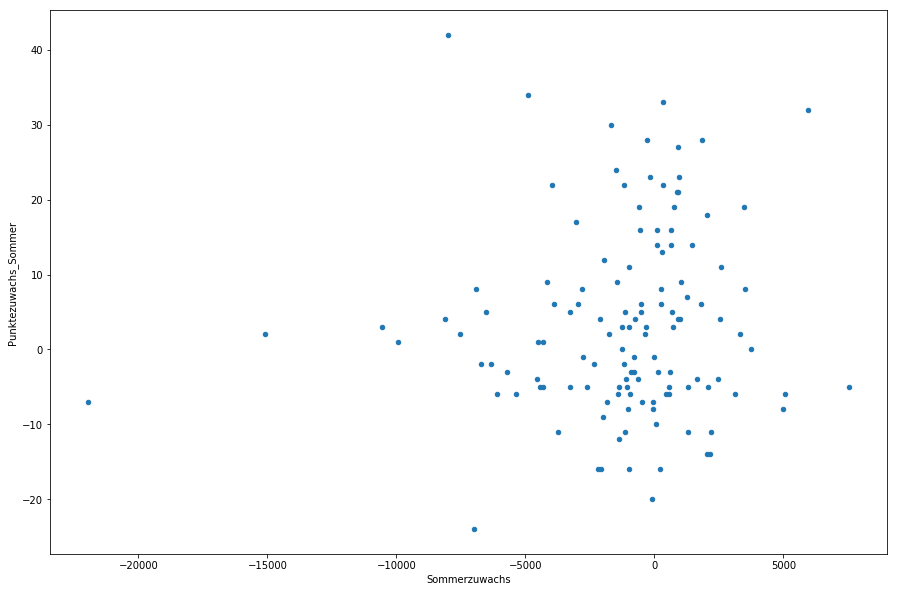

In [22]:
dft.plot(x='Sommerzuwachs', y='Punktezuwachs_Sommer', kind='scatter', figsize=(15,10))

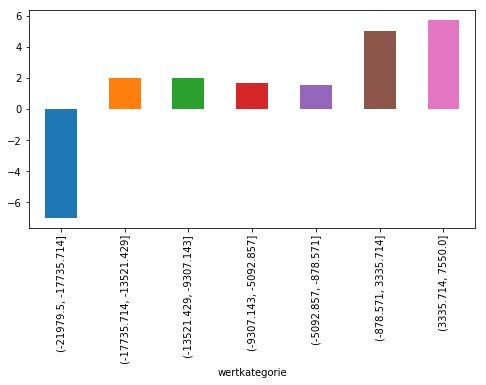

In [36]:
dft["wertkategorie"] = pd.cut(dft['Sommerzuwachs'], bins=7)
dft.groupby ("wertkategorie")["Punktezuwachs_Sommer"].mean().plot(kind='bar', figsize=(8,4))

Von links unten nach rechts oben: Hier stimmt die erwartete Tendenz. Unter dem Strich aber am auffallendsten: Wintertransfer-Wertezuwachs ist meist unproduktiv.

## Welches sind die im Winter unproduktivsten Teams? In welchen Saisons waren sie besonders unproduktiv?
Es gibt acht Fälle, in denen Teams im Winter mehr als eine Million Euro an Wert gewannen, aber dennoch in der Rückrunde gegenüber der Hinrunde mehr als fünf Punkte verloren. Die Grasshoppers traf es vier Mal, St.Gallen zweimal:

In [219]:
dft[(dft["Punktezuwachs"] < -5) & (dft["winterzuwachs"] > 1000)]

,Unnamed: 0,Anzahlsommertransfers,Anzahlwintertransfers,Saison,Sommeraus,Sommerein,Team,Winteraus,Winterein,Hinrundenpunkte,Rückrundenpunkte,vorherige_rückrundenpunkte,winterzuwachs,Punktezuwachs,Sommerzuwachs,Punktezuwachs_Sommer,wertkategorie
34,34,19.0,7.0,2012,1980,2300,St.Gallen,950,2000,33.0,26.0,0.0,1050,-7.0,320,33.0,"(175.0, 420.833]"
37,37,20.0,15.0,2015,3750,4450,St.Gallen,3550,5400,23.0,15.0,18.0,1850,-8.0,700,5.0,"(666.667, 912.5]"
54,54,20.0,7.0,2006,5250,2300,Grasshoppers,2930,4380,31.0,19.0,25.0,1450,-12.0,-2950,6.0,"(-3020.833, -2775.0]"
56,56,20.0,12.0,2008,4680,4050,Grasshoppers,1800,6450,30.0,21.0,34.0,4650,-9.0,-630,-4.0,"(-808.333, -562.5]"
63,63,30.0,10.0,2015,11080,6930,Grasshoppers,5600,10000,33.0,20.0,24.0,4400,-13.0,-4150,9.0,"(-4250.0, -4004.167]"
64,64,22.0,15.0,2016,22100,7000,Grasshoppers,2850,8800,22.0,16.0,20.0,5950,-6.0,-15100,2.0,"(-15312.5, -15066.667]"
128,128,32.0,14.0,2017,8200,4250,Lausanne,4850,7630,22.0,13.0,0.0,2780,-9.0,-3950,22.0,"(-4004.167, -3758.333]"
148,148,30.0,8.0,2012,6000,9500,Sion,2800,6150,32.0,16.0,24.0,3350,-16.0,3500,8.0,"(3370.833, 3616.667]"


## Wo liegen die einzelnen Teams auf einem Scatterplot?

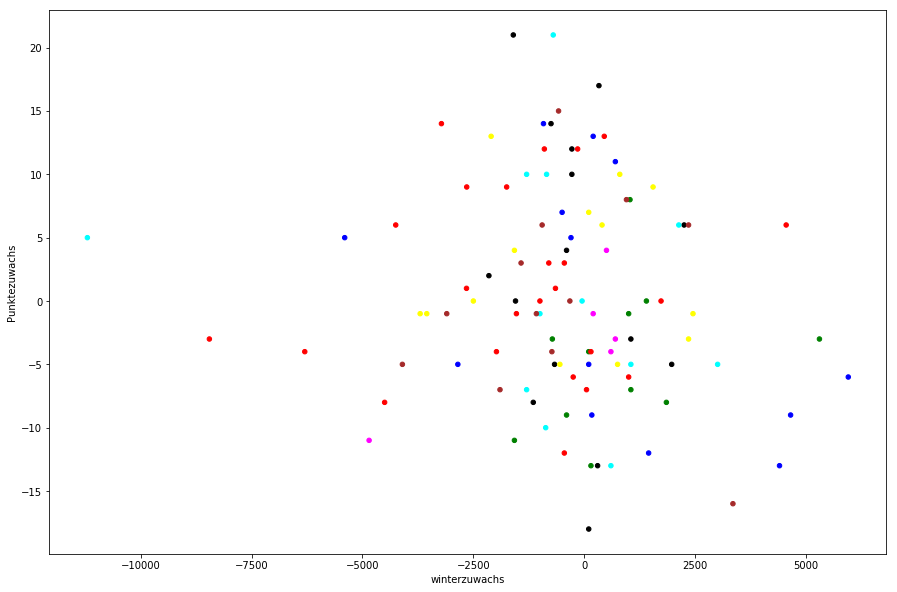

In [221]:
teamcolor = {'Basel': "red", "YB": 'yellow', 'St.Gallen' : "green", "Luzern" : "black", "Grasshoppers" : "blue","Thun" : "red",
            "Sion" : "brown", "Zürich" : "cyan", "Lugano" : "black", "Xamax" : "magenta"}
dfts.plot(x='winterzuwachs', y='Punktezuwachs', kind='scatter', figsize=(15,10),
       color=[teamcolor.get(Basel) for Basel in dfts.Team])
    
    

Auch hier das Fazit: GC und FCSG haben die schwächste Bilanz

Diese Bilanz rechne ich nun noch genauer aus. Hier rechne ich den durchschnittlichen Punktezuwachs bzw -rückgang von Hin- zu Rückrunde aller Super-League-Teams aus (seit der Saison 2005/06) sowie den Median des Teamwertezuwachses - bzw. -rückgangs der Teams im Winter. Diese Daten verwende ich später in der Tagblatt-Printausgabe für eine Grafik.

In [222]:
for team in teamliste: 
    print(team + " : " + str(dft[dft["Team"] == team]["winterzuwachs"].median()) + " : " + str(dft[dft["Team"] == team]["Punktezuwachs"].median()))
     
    

Basel : -1750.0 : -3.0
Yverdon : -1000.0 : -10.0
YB : 100.0 : 0.0
Bellinzona : 580.0 : -5.0
Schaffhausen : 190.0 : -2.0
St.Gallen : 1000.0 : -4.0
Xamax : 500.0 : -3.0
Servette : 50.0 : 4.0
Thun : -450.0 : 1.0
Wil : nan : nan
Grasshoppers : 170.0 : -5.0
Lugano : 330.0 : 4.0
Luzern : -475.0 : 1.0
Aarau : -325.0 : 2.0
Zürich : -775.0 : -0.5
Sion : -840.0 : -0.5
Vaduz : 0.0 : -3.5
Lausanne : 800.0 : 0.5


## Berechnungen für Haupt-Infografik
Nun schaue ich, in welchen Transferwert-Bereichen wie viele Teams an Punkten gewannen/verloren: Das ist letztlich die Grundlage für die Hauptgrafik im Artikel.

In [82]:
# Transferbereich bis -3500 Tsd. Euro
bessereteams = dft[(dft["winterzuwachs"] < -3500) & (dft["Punktezuwachs"] >= 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] < -3500) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 3
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 7
In Prozent: 30.0 zu 70.0


In [81]:
# Transferbereich -3500 bis -2000 Tsd. Euro
bessereteams = dft[(dft["winterzuwachs"] >= -3500) & (dft["winterzuwachs"] < -2000) & (dft["Punktezuwachs"] >= 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= -3500) & (dft["winterzuwachs"] < -2000) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 6
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 3
In Prozent: 66.66666666666666 zu 33.33333333333334


In [80]:
# Transferbereich -2000 bis -1000 Tsd. Euro
bessereteams = dft[(dft["winterzuwachs"] >= -2000) & (dft["winterzuwachs"] < -1000) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= -2000) & (dft["winterzuwachs"] < -1000) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 6
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 8
In Prozent: 42.85714285714286 zu 57.14285714285714


In [83]:
# Transferbereich -1000 bis 0 Tsd. Euro
bessereteams = dft[(dft["winterzuwachs"] >= -1000) & (dft["winterzuwachs"] < 0) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= -1000) & (dft["winterzuwachs"] < 0) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 18
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 17
In Prozent: 51.42857142857143 zu 48.57142857142857


In [47]:
# Transferbereich 0 bis 999 Tsd. Euro
bessereteams = dft[(dft["winterzuwachs"] >= 0) & (dft["winterzuwachs"] < 1000) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= 0) & (dft["winterzuwachs"] < 1000) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 14
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 18
In Prozent: 43.75 zu 56.25


In [54]:
# Transferbereich 1000 - 1999
bessereteams = dft[(dft["winterzuwachs"] >= 1000) & (dft["winterzuwachs"] < 2000) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= 1000) & (dft["winterzuwachs"] < 2000) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))


Anzahl bessere Teams in dieser Transferwert-Bandbreite: 5
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 10
In Prozent: 33.333333333333336 zu 66.66666666666666


In [53]:
# Transferbereich 2000 - 3499
bessereteams = dft[(dft["winterzuwachs"] >= 2000) & (dft["winterzuwachs"] < 3500) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= 2000) & (dft["winterzuwachs"] < 3500) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 3
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 5
In Prozent: 37.5 zu 62.5


In [55]:
# Transferbereich ab 3500
bessereteams = dft[(dft["winterzuwachs"] >= 3500) & (dft["Punktezuwachs"] > 0)]["Punktezuwachs"].size
schlechtereteams = dft[(dft["winterzuwachs"] >= 3500) & (dft["Punktezuwachs"] <= 0)]["Punktezuwachs"].size
inprozentbesser = 100/(bessereteams+schlechtereteams)*bessereteams
inprozentschlechter = 100 - inprozentbesser

print("Anzahl bessere Teams in dieser Transferwert-Bandbreite: " + str(bessereteams))
print("Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: " + str(schlechtereteams))
print("In Prozent: " + str(inprozentbesser) + " zu " + str(inprozentschlechter))

Anzahl bessere Teams in dieser Transferwert-Bandbreite: 1
Anzahl schlechtere Teams in dieser Transferwert-Bandbreite: 4
In Prozent: 20.0 zu 80.0


PS: Gewisse kleinere Abweichungen von der Hauptinfografik im publizierten Artikel ergeben sich bei den Prozentzahlen, da ich in einer ersten Code-Fassung nur jene Teams berücksichtigt hatte, die in der Super-League mindestens vier Saisons spielten. Hauptaussage bleibt sich aber gleich.